In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplitlib inline

UsageError: Line magic function `%matplitlib` not found.


In [11]:
df = pd.read_csv('C:\\Users\\Mithunsomu\\Downloads\\covid.csv')
df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF


In [15]:
df.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
iso_alpha             0
dtype: int64

In [19]:
df.shape

(209, 17)

In [31]:
#Dropping the 3 columns as they have more  empty values around 98%
df.drop(columns=['NewCases','NewDeaths','NewRecovered'], axis = 1, inplace  = True)

In [37]:
#The data types are all correct as per the data intended 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   TotalDeaths       188 non-null    float64
 5   TotalRecovered    205 non-null    float64
 6   ActiveCases       205 non-null    float64
 7   Serious,Critical  122 non-null    float64
 8   Tot Cases/1M pop  208 non-null    float64
 9   Deaths/1M pop     187 non-null    float64
 10  TotalTests        191 non-null    float64
 11  Tests/1M pop      191 non-null    float64
 12  WHO Region        184 non-null    object 
 13  iso_alpha         209 non-null    object 
dtypes: float64(9), int64(1), object(4)
memory usage: 23.0+ KB


<Axes: >

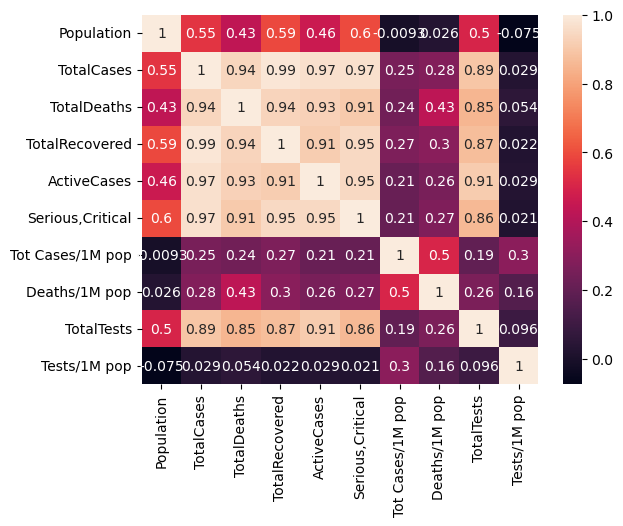

In [143]:
numeric_data = df[['Population','TotalCases','TotalDeaths','TotalRecovered','ActiveCases','Serious,Critical','Tot Cases/1M pop','Deaths/1M pop','TotalTests','Tests/1M pop']]
num_cor = numeric_data.corr()

sns.heatmap(num_cor,annot = True)

As we can see there is a strong positive correlation between Active Totalcases to Total deaths, total recovered, criticality, increasing in one variable results in increase in other variables, having moderate correlation btw totaltests and population.

In [63]:
df[df['Country/Region'].isin(['Diamond Princess'])]

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
156,Diamond Princess,NaN,NaN,712,13.0,651.0,48.0,4.0,NaN,NaN,NaN,NaN,NaN,


In [73]:
df.drop(index = 156, inplace = True)

<Axes: xlabel='Continent', ylabel='count'>

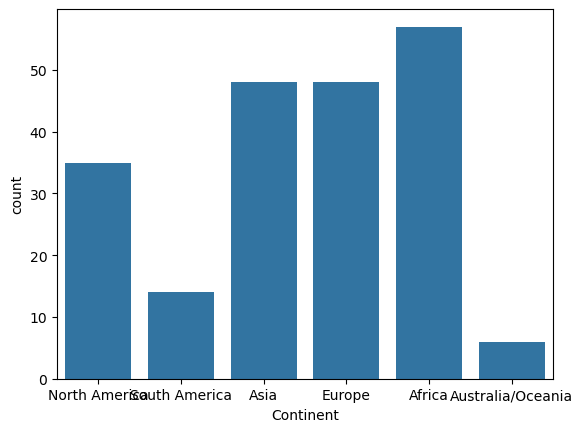

In [83]:
sns.countplot(data = df, x='Continent')

<Axes: xlabel='Country/Region', ylabel='TotalCases'>

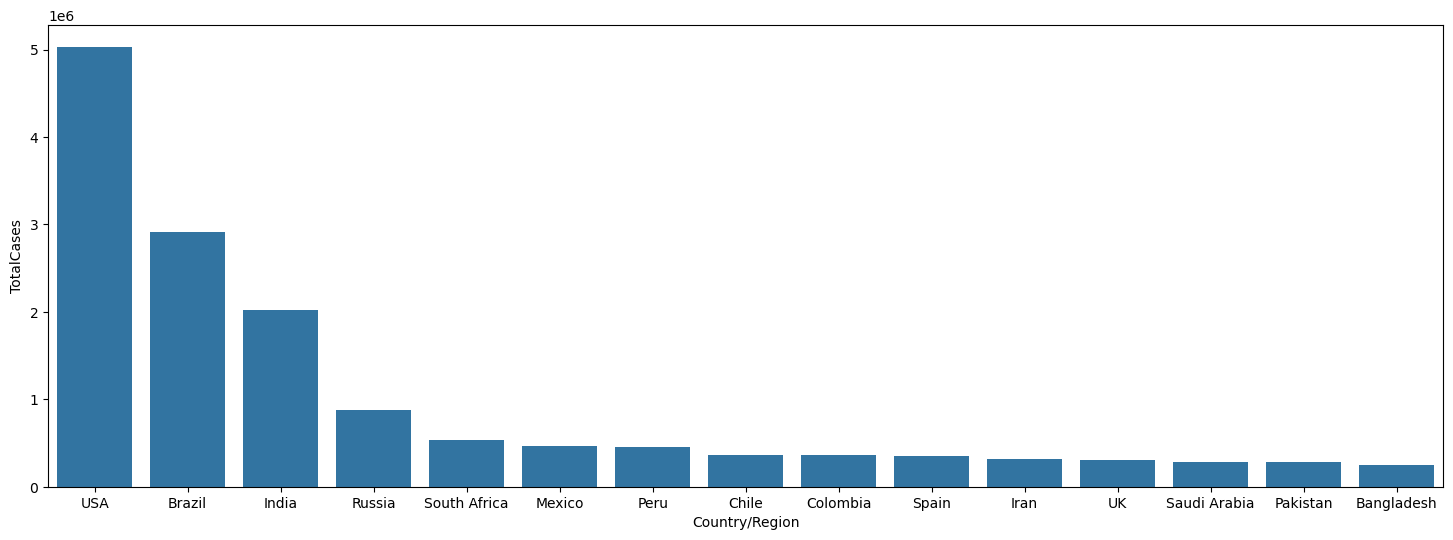

In [95]:
plt.figure(figsize=(18,6))
sns.barplot(data = df.head(15), x='Country/Region', y='TotalCases')

<Axes: xlabel='Continent', ylabel='TotalCases'>

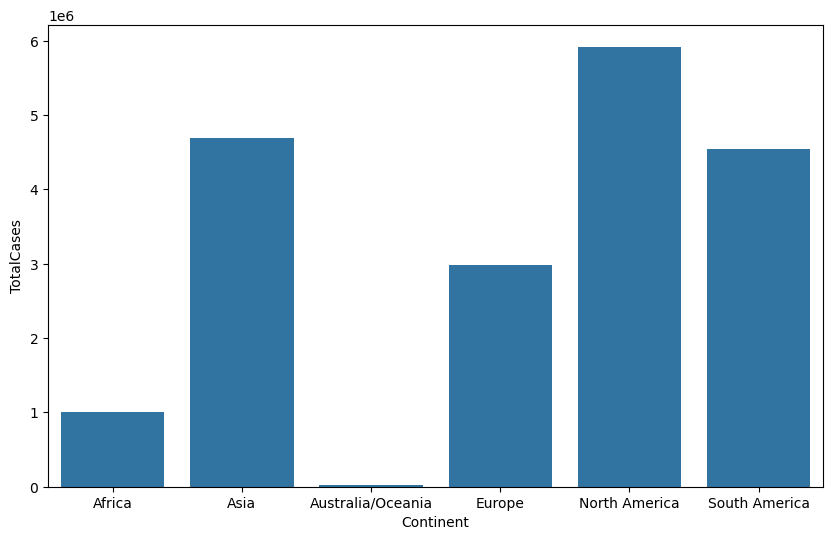

In [131]:
#Bar chat of Total cases as per continents
d = df.groupby(['Continent'])['TotalCases'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data = d, x='Continent', y='TotalCases')


As we can see North america tops the total cases followed by Asia and South America

<Axes: xlabel='Country/Region', ylabel='TotalDeaths'>

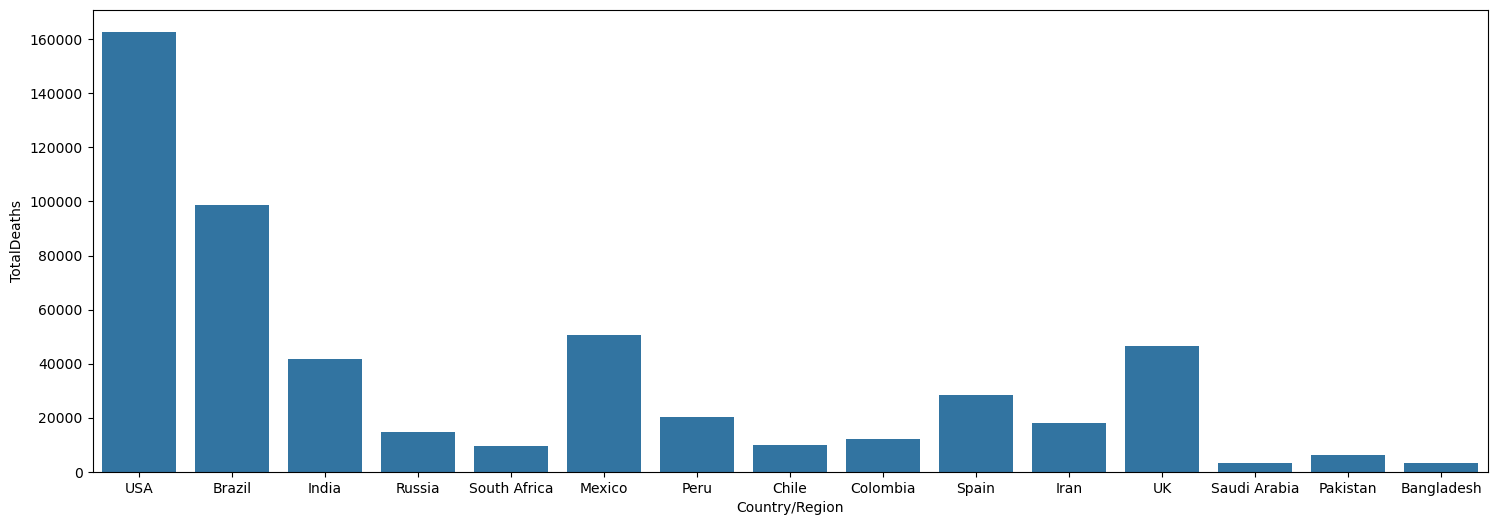

In [97]:
plt.figure(figsize=(18,6))
sns.barplot(data = df.head(15), x='Country/Region', y='TotalDeaths')

<Axes: xlabel='Country/Region', ylabel='Tests/1M pop'>

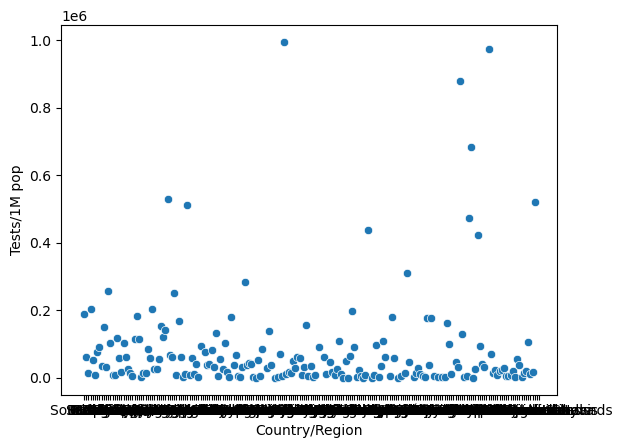

In [157]:
sns.scatterplot(data = df,x='Country/Region',y='Tests/1M pop')